# Robustness
In this example we analyze how robust feature selection with BINN is. All feature selection methods are data-greedy, meaning that we need many samples to generate robust estimations of feature importance. One way to analyze this is to train and explain several models, and compare their feature importances. This will also yield a more robust method.

In [18]:
from binn import BINN, BINNDataLoader, BINNTrainer
import pandas as pd

# Load your data
data_matrix = pd.read_csv("../data/sample_datamatrix.csv")
design_matrix = pd.read_csv("../data/sample_design_matrix.tsv", sep="\t")

# Initialize BINN
binn = BINN(data_matrix=data_matrix, network_source="reactome", n_layers=5, dropout=0.2)

## Initialize DataLoader
binn_dataloader = BINNDataLoader(binn)

# Create DataLoaders
dataloaders = binn_dataloader.create_dataloaders(
    data_matrix=data_matrix,
    design_matrix=design_matrix,
    feature_column="Protein",
    group_column="group",
    sample_column="sample",
    batch_size=32,
    validation_split=0.2,
)
# Train the model
trainer = BINNTrainer(binn)

from binn import BINNExplainer

explainer = BINNExplainer(binn)

average_importances = explainer.explain(dataloaders, nr_iterations=10, num_epochs=100, trainer=trainer)


[INFO] BINN is on device: cpu
Mapping group labels: {np.int64(1): 0, np.int64(2): 1}
[BINNExplainer] Iteration 1/10...
[Epoch 1/100] Train Loss: 0.8245, Train Accuracy: 0.4890
[Epoch 1/100] Val Loss: 0.6930, Val Accuracy: 0.5312
[Epoch 2/100] Train Loss: 0.7995, Train Accuracy: 0.5466
[Epoch 2/100] Val Loss: 0.6929, Val Accuracy: 0.5312
[Epoch 3/100] Train Loss: 0.8026, Train Accuracy: 0.4966
[Epoch 3/100] Val Loss: 0.6929, Val Accuracy: 0.5312
[Epoch 4/100] Train Loss: 0.7510, Train Accuracy: 0.5672
[Epoch 4/100] Val Loss: 0.6927, Val Accuracy: 0.5312
[Epoch 5/100] Train Loss: 0.6460, Train Accuracy: 0.6323
[Epoch 5/100] Val Loss: 0.6923, Val Accuracy: 0.5312
[Epoch 6/100] Train Loss: 0.7882, Train Accuracy: 0.5009
[Epoch 6/100] Val Loss: 0.6922, Val Accuracy: 0.5312
[Epoch 7/100] Train Loss: 0.7492, Train Accuracy: 0.5761
[Epoch 7/100] Val Loss: 0.6912, Val Accuracy: 0.5312
[Epoch 8/100] Train Loss: 0.6531, Train Accuracy: 0.6172
[Epoch 8/100] Val Loss: 0.6890, Val Accuracy: 0.5312


In [19]:
average_importances["copy"] = average_importances.apply(lambda x: True if x["source_node"] == x["target_node"] else False, axis=1)
average_importances = average_importances[average_importances["copy"] == False]
average_importances

,source_layer,target_layer,source_node,target_node,class_idx,importance,importance_0,importance_1,importance_2,importance_3,importance_4,importance_5,importance_6,importance_7,importance_8,importance_9,importance_mean,importance_std,copy
0,0,1,A0M8Q6,R-HSA-166786,0,0.011948,0.011785,0.008248,0.001901,0.002828,0.014411,0.009897,0.019872,0.019127,0.017853,0.013554,0.011948,0.005999,False
1,0,1,A0M8Q6,R-HSA-166786,1,0.012756,0.025276,0.008121,0.002107,0.006349,0.000183,0.011985,0.042733,0.004889,0.017010,0.008910,0.012756,0.012185,False
2,0,1,A0M8Q6,R-HSA-198933,0,0.011948,0.011785,0.008248,0.001901,0.002828,0.014411,0.009897,0.019872,0.019127,0.017853,0.013554,0.011948,0.005999,False
3,0,1,A0M8Q6,R-HSA-198933,1,0.012756,0.025276,0.008121,0.002107,0.006349,0.000183,0.011985,0.042733,0.004889,0.017010,0.008910,0.012756,0.012185,False
4,0,1,A0M8Q6,R-HSA-2029481,0,0.011948,0.011785,0.008248,0.001901,0.002828,0.014411,0.009897,0.019872,0.019127,0.017853,0.013554,0.011948,0.005999,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,5,6,R-HSA-9612973,output_node,1,0.193043,0.156741,0.149040,0.268299,0.256439,0.165209,0.178136,0.192941,0.277854,0.200014,0.085758,0.193043,0.057171,False
8698,5,6,R-HSA-9709957,output_node,0,0.159294,0.120762,0.124658,0.096387,0.057145,0.041926,0.359159,0.283454,0.125765,0.287407,0.096280,0.159294,0.103789,False
8699,5,6,R-HSA-9709957,output_node,1,0.154419,0.158056,0.012353,0.224409,0.188909,0.219029,0.263253,0.282962,0.045354,0.023256,0.126611,0.154419,0.094180,False
8700,5,6,R-HSA-9748784,output_node,0,0.156089,0.073163,0.223780,0.205714,0.101832,0.134991,0.148233,0.057250,0.063124,0.298062,0.254744,0.156089,0.081039,False


In [20]:
importance_df_copy = average_importances.groupby(["source_node", "source_layer", "target_layer"], as_index=False).mean(numeric_only=True)
mean_ranks = []
std_ranks = []
source_layer = []
sources = []
for layer in range(binn.n_layers):
    layer_df = importance_df_copy[importance_df_copy["source_layer"] == layer].copy()
    for i in range(5):
        layer_df.sort_values(f"importance_{i}", ascending=False, inplace=True)
        layer_df[f"rank_{i}"] = range(len(layer_df.index))
    rank_cols = [c for c in layer_df.columns if c.startswith("rank")]
    mean_ranks += (layer_df[rank_cols].mean(axis=1)/ len(layer_df.index)).tolist()
    sources += layer_df["source_node"].tolist()
    std_ranks  += (layer_df[rank_cols].std(axis=1)/ len(layer_df.index)).tolist()
    source_layer += layer_df["source_layer"].tolist()
plot_df = pd.DataFrame({"mean":mean_ranks, "std":std_ranks, "source layer":source_layer, "source":sources})

In [21]:
plot_df.sort_values("mean").head(20)

,mean,std,source layer,source
447,0.002532,0.005661,1,R-HSA-8949275
2,0.004027,0.004585,0,P60709
0,0.005817,0.007685,0,P04908
684,0.006854,0.010881,2,R-HSA-5696394
685,0.009969,0.011944,2,R-HSA-8878159
690,0.013707,0.012577,2,R-HSA-140534
7,0.014318,0.008606,0,P04114
1,0.014765,0.014202,0,Q96A08
688,0.014953,0.004062,2,R-HSA-5693565
4,0.017002,0.018009,0,P25788


If we now plot the (normalized) mean and standard deviation of the rank, we see that highly important features generally have a low standard deviation. We can therefore be the most certain about the most important features.

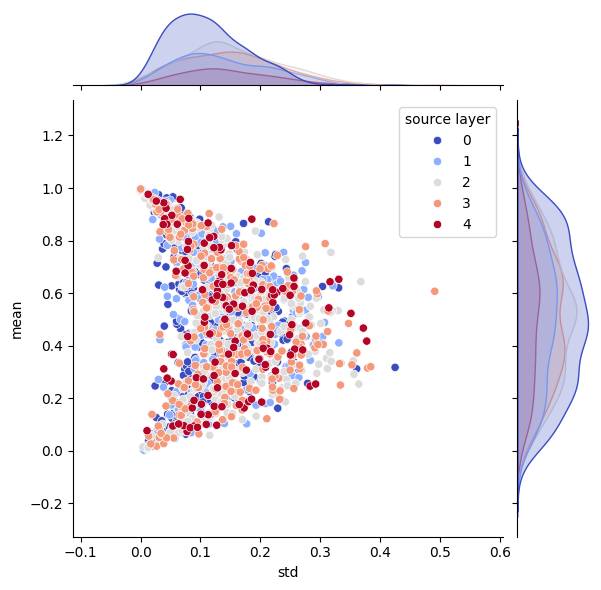

In [22]:
import seaborn as sns

sns.jointplot(plot_df, y="mean", x="std", hue="source layer", palette="coolwarm")